# Объявления переменных и корреляция

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

In [ ]:
df = pd.read_csv('spotify.csv')

In [ ]:
df

Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1              0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2              0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3              0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4              0.618  0.4430  ...    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350  ...   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170  ...   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290  ...   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060  ...   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870  ...   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.97

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
df['popularity'].value_counts()

popularity
0      16020
22      2354
21      2344
44      2288
1       2140
       ...  
96         7
94         7
95         5
100        2
99         1
Name: count, Length: 101, dtype: int64

50 - 94

In [ ]:
df['popularity'].unique()

array([ 73,  55,  57,  71,  82,  58,  74,  80,  56,  69,  52,  62,  54,
        68,  67,  75,  63,  70,   0,   1,  46,  61,  60,  51,  66,  64,
        65,  44,  45,  50,  59,  49,  53,  47,  43,  42,  20,  22,  35,
        19,  24,  18,  23,  40,  38,  41,  30,  37,  39,  48,  36,  34,
        26,  32,  33,  21,  31,  28,  29,  27,  25,  16,   3,  12,   7,
        10,   9,  11,  17,   8,  15,  87,  83,  86,  93,  76,  78,   4,
         2,   5,  85,  81,  84,  72,  79,  77,   6,  13,  14,  89,  96,
       100,  98,  88,  92,  90,  91,  99,  97,  95,  94])

In [ ]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [ ]:
df.shape

(113999, 21)

In [ ]:
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
categorical_features

['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

Пока мы не перевели категорию track_genre в численный вид. Создадим отдельный признак для нашей нейросети, ведь жанр напрямую связан с популярностью.

In [ ]:
genre_popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

top_genres = genre_popularity[genre_popularity > genre_popularity.quantile(0.9)].index
bottom_genres = genre_popularity[genre_popularity < genre_popularity.quantile(0.1)].index

def classify_genre(genre):
    if genre in top_genres:
        return 1
    elif genre in bottom_genres:
        return -1
    else:
        return 0

df['genre_quality'] = df['track_genre'].apply(classify_genre)

genre_quality_counts = df['genre_quality'].value_counts()

genre_quality_counts

<ipython-input-14-79669ac06478>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre_quality'] = df['track_genre'].apply(classify_genre)


genre_quality
 0    90000
-1    12000
 1    11999
Name: count, dtype: int64

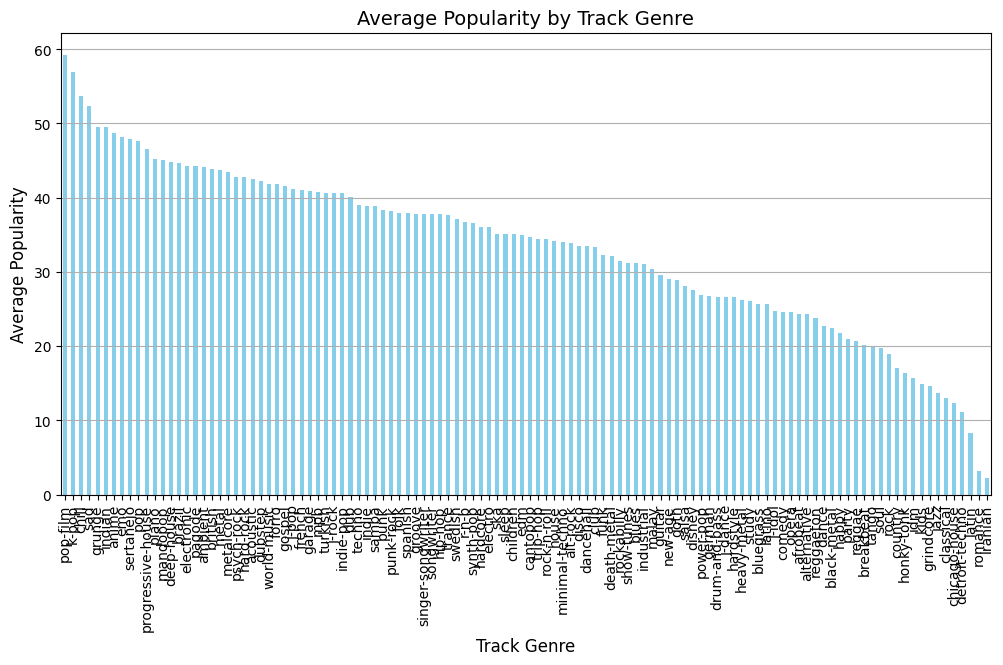

In [ ]:
plt.figure(figsize=(12, 6))
genre_popularity.plot(kind='bar', color='skyblue')
plt.title('Average Popularity by Track Genre', fontsize=14)
plt.xlabel('Track Genre', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

Нам не так важно знать, какой из жанров больше всего популярен. Создадим признак, в котором 1 - популярный жанр, 0 - нейтрален, -1 - непопулярный жанр

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

<ipython-input-16-b932ef9ef812>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-16-b932ef9ef812>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-16-b932ef9ef812>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [ ]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
genre_quality       0
dtype: int64

In [ ]:
del df["track_id"]
del df["Unnamed: 0"]
df.head()

artists  album_name  track_name  popularity  duration_ms  explicit  \
0    10357        8100       11741          73       230666     False   
1     3287       14796       22528          55       149610     False   
2    12397       39162       60774          57       210826     False   
3    14839        8580        9580          71       201933     False   
4     5255       16899       25689          82       198853     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  \
0          0.000001    0.3580    0.715   87.917               4            0   
1          0.000006    0.1010    0.267   77.489               4            0   
2          0.000000    0.1170    0.120   76.332               4            0   
3          0.000071    0.1320    0.143  181.740               3            0   
4          0.000000    0.0829    0.167  119.949               4            0   

   genre_quality  
0              0  
1              0  
2              0  
3              0  
4              0

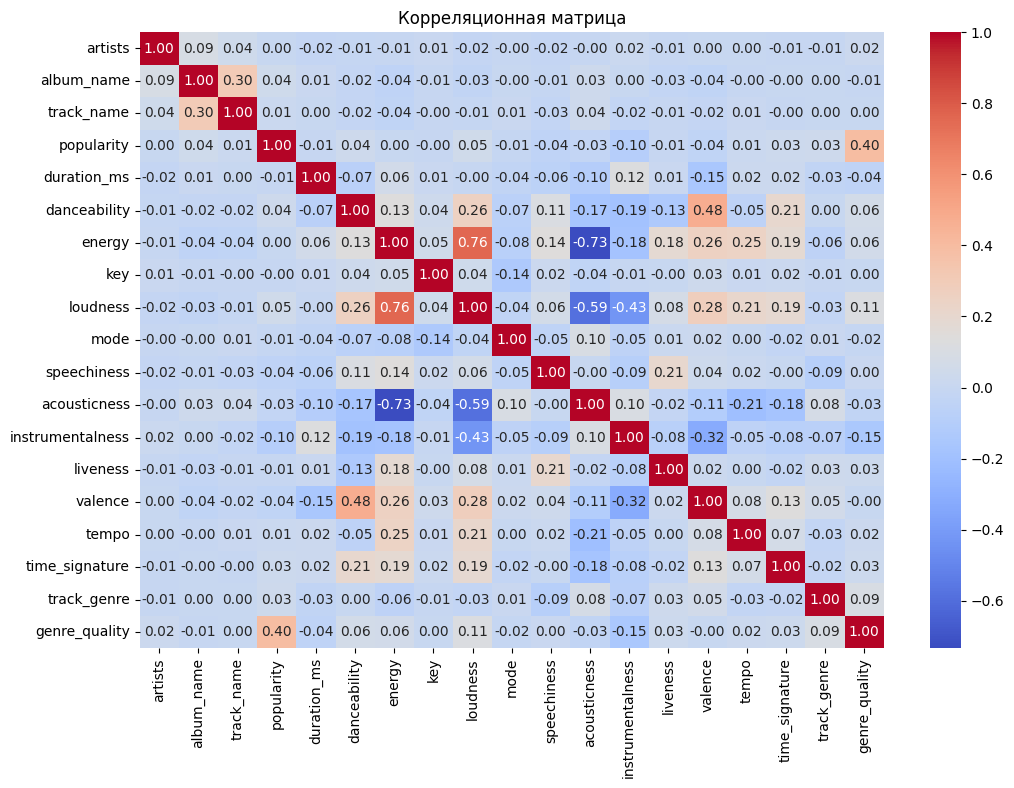

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

numerical_data = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_data.corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')

plt.title('Корреляционная матрица')

plt.show()


Видим высокую корреляцию между acousticness, energy и loudness. Также между loudness и energy.

В целях избежания избыточности схожей информации оставим только один из этих столбцов.

In [ ]:
del df["energy"]
del df["acousticness"]
del df["album_name"]
del df["track_name"]
df.head()

artists  popularity  duration_ms  explicit  danceability  key  loudness  \
0    10357          73       230666     False         0.676    1    -6.746   
1     3287          55       149610     False         0.420    1   -17.235   
2    12397          57       210826     False         0.438    0    -9.734   
3    14839          71       201933     False         0.266    0   -18.515   
4     5255          82       198853     False         0.618    2    -9.681   

   mode  speechiness  instrumentalness  liveness  valence    tempo  \
0     0       0.1430          0.000001    0.3580    0.715   87.917   
1     1       0.0763          0.000006    0.1010    0.267   77.489   
2     1       0.0557          0.000000    0.1170    0.120   76.332   
3     1       0.0363          0.000071    0.1320    0.143  181.740   
4     1       0.0526          0.000000    0.0829    0.167  119.949   

   time_signature  track_genre  genre_quality  
0               4            0              0  
1               4            0              0  
2               4            0              0  
3               3            0              0  
4               4            0              0

In [ ]:
correlation_matrix = df.corr()

correlation_with_target = correlation_matrix['popularity'].sort_values(ascending=False)

print(correlation_with_target)


popularity          1.000000
genre_quality       0.396853
loudness            0.050420
explicit            0.044078
danceability        0.035444
track_genre         0.032696
time_signature      0.031076
tempo               0.013212
artists             0.003636
key                -0.003847
liveness           -0.005397
duration_ms        -0.007129
mode               -0.013948
valence            -0.040522
speechiness        -0.044930
instrumentalness   -0.095147
Name: popularity, dtype: float64


In [ ]:
label_encoder = LabelEncoder()
df['explicit'] = df['explicit'].astype(int)

label_encoder = LabelEncoder()
df['track_genre'] = label_encoder.fit_transform(df['track_genre'])

df

<ipython-input-22-08c0916c3dff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['explicit'] = df['explicit'].astype(int)
<ipython-input-22-08c0916c3dff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['track_genre'] = label_encoder.fit_transform(df['track_genre'])


artists  popularity  duration_ms  explicit  danceability  key  \
0         10357          73       230666         0         0.676    1   
1          3287          55       149610         0         0.420    1   
2         12397          57       210826         0         0.438    0   
3         14839          71       201933         0         0.266    0   
4          5255          82       198853         0         0.618    2   
...         ...         ...          ...       ...           ...  ...   
113995    22486          21       384999         0         0.172    5   
113996    22486          22       385000         0         0.174    0   
113997     4952          22       271466         0         0.629    0   
113998    18534          41       283893         0         0.587    7   
113999     4952          22       241826         0         0.526    1   

        loudness  mode  speechiness  instrumentalness  liveness  valence  \
0         -6.746     0       0.1430          0.000001    0.3580   0.7150   
1        -17.235     1       0.0763          0.000006    0.1010   0.2670   
2         -9.734     1       0.0557          0.000000    0.1170   0.1200   
3        -18.515     1       0.0363          0.000071    0.1320   0.1430   
4         -9.681     1       0.0526          0.000000    0.0829   0.1670   
...          ...   ...          ...               ...       ...      ...   
113995   -16.393     1       0.0422          0.928000    0.0863   0.0339   
113996   -18.318     0       0.0401          0.976000    0.1050   0.0350   
113997   -10.895     0       0.0420          0.000000    0.0839   0.7430   
113998   -10.889     1       0.0297          0.000000    0.2700   0.4130   
113999   -10.204     0       0.0725          0.000000    0.0893   0.7080   

          tempo  time_signature  track_genre  genre_quality  
0        87.917               4            0              0  
1        77.489               4            0              0  
2        76.332               4            0              0  
3       181.740               3            0              0  
4       119.949               4            0              0  
...         ...             ...          ...            ...  
113995  125.995               5          113              0  
113996   85.239               4          113              0  
113997  132.378               4          113              0  
113998  135.960               4          113              0  
113999   79.198               4          113              0  

[113999 rows x 16 columns]

По таблице видно, что loundess, track_genre, explicit, instrumentalness, speechiness и valence сильно связаны с популярностью.

# EDA

Возможно, треки средней продолжительности более популярны, чем короткие или длинные.

In [ ]:
df

artists  popularity  duration_ms  explicit  danceability  key  \
0         10357          73       230666         0         0.676    1   
1          3287          55       149610         0         0.420    1   
2         12397          57       210826         0         0.438    0   
3         14839          71       201933         0         0.266    0   
4          5255          82       198853         0         0.618    2   
...         ...         ...          ...       ...           ...  ...   
113995    22486          21       384999         0         0.172    5   
113996    22486          22       385000         0         0.174    0   
113997     4952          22       271466         0         0.629    0   
113998    18534          41       283893         0         0.587    7   
113999     4952          22       241826         0         0.526    1   

        loudness  mode  speechiness  instrumentalness  liveness  valence  \
0         -6.746     0       0.1430          0.000001    0.3580   0.7150   
1        -17.235     1       0.0763          0.000006    0.1010   0.2670   
2         -9.734     1       0.0557          0.000000    0.1170   0.1200   
3        -18.515     1       0.0363          0.000071    0.1320   0.1430   
4         -9.681     1       0.0526          0.000000    0.0829   0.1670   
...          ...   ...          ...               ...       ...      ...   
113995   -16.393     1       0.0422          0.928000    0.0863   0.0339   
113996   -18.318     0       0.0401          0.976000    0.1050   0.0350   
113997   -10.895     0       0.0420          0.000000    0.0839   0.7430   
113998   -10.889     1       0.0297          0.000000    0.2700   0.4130   
113999   -10.204     0       0.0725          0.000000    0.0893   0.7080   

          tempo  time_signature  track_genre  genre_quality  
0        87.917               4            0              0  
1        77.489               4            0              0  
2        76.332               4            0              0  
3       181.740               3            0              0  
4       119.949               4            0              0  
...         ...             ...          ...            ...  
113995  125.995               5          113              0  
113996   85.239               4          113              0  
113997  132.378               4          113              0  
113998  135.960               4          113              0  
113999   79.198               4          113              0  

[113999 rows x 16 columns]

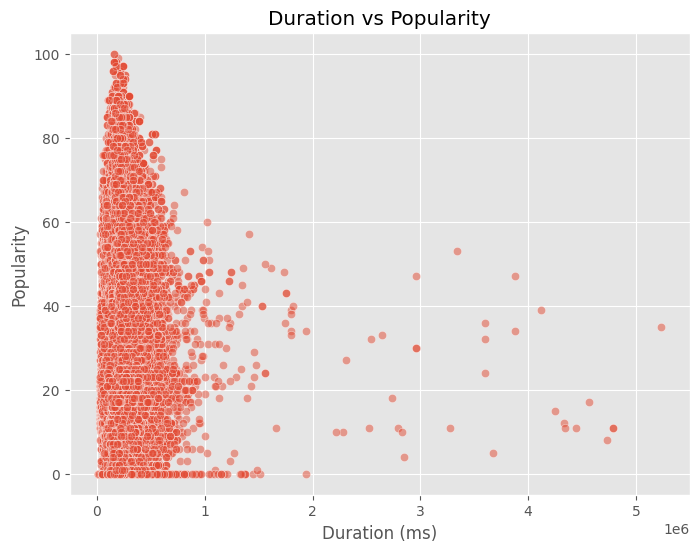

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
plt.style.use("ggplot")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='duration_ms', y='popularity', data=df, alpha=0.5)
plt.title("Duration vs Popularity")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()

Видим, что наибольшая популярность достигается при длительности > 100000ms и < 300000ms

In [ ]:
df['mid_duration'] = ((df['duration_ms'] > 150000) &
                                        (df['duration_ms'] < 300000)).astype(int)

<ipython-input-25-900f3503f176>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mid_duration'] = ((df['duration_ms'] > 150000) &


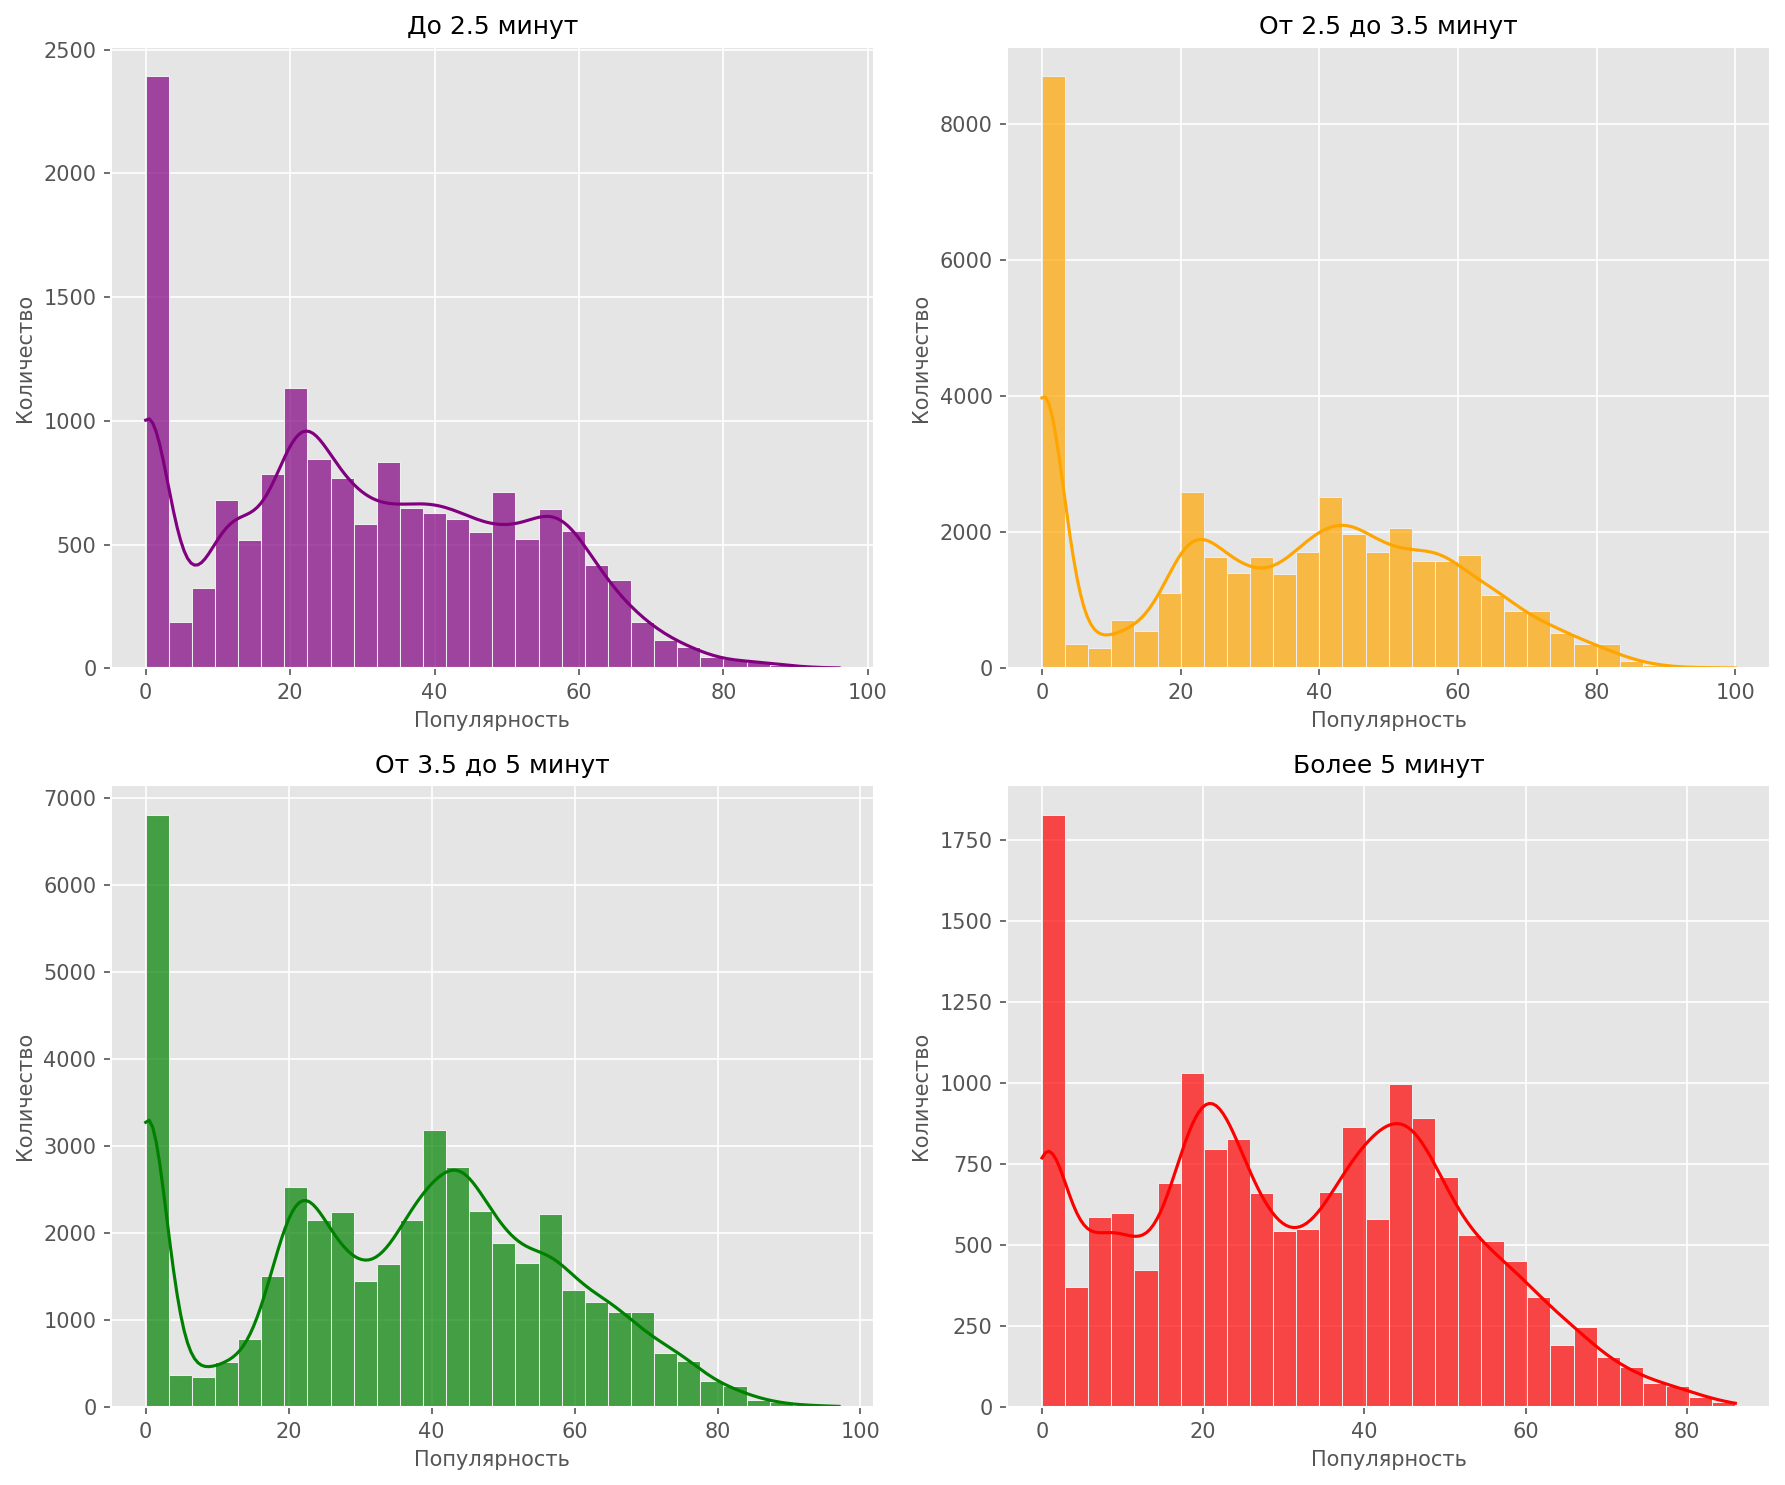

In [ ]:
plt.figure(figsize=(12, 10), dpi=150)


plt.subplot(2, 2, 1)
sns.histplot(df[df['duration_ms'] <= 150000]['popularity'], bins=30, kde=True, color='purple', alpha=0.7)
plt.title("До 2.5 минут", fontsize=12)
plt.xlabel("Популярность", fontsize=10)
plt.ylabel("Количество", fontsize=10)


plt.subplot(2, 2, 2)
sns.histplot(df[(df['duration_ms'] > 150000) & (df['duration_ms'] <= 210000)]['popularity'], bins=30, kde=True, color='orange', alpha=0.7)
plt.title("От 2.5 до 3.5 минут", fontsize=12)
plt.xlabel("Популярность", fontsize=10)
plt.ylabel("Количество", fontsize=10)


plt.subplot(2, 2, 3)
sns.histplot(df[(df['duration_ms'] > 210000) & (df['duration_ms'] <= 300000)]['popularity'], bins=30, kde=True, color='green', alpha=0.7)
plt.title("От 3.5 до 5 минут", fontsize=12)
plt.xlabel("Популярность", fontsize=10)
plt.ylabel("Количество", fontsize=10)


plt.subplot(2, 2, 4)
sns.histplot(df[df['duration_ms'] > 300000]['popularity'], bins=30, kde=True, color='red', alpha=0.7)
plt.title("Более 5 минут", fontsize=12)
plt.xlabel("Популярность", fontsize=10)
plt.ylabel("Количество", fontsize=10)

plt.tight_layout()
plt.show()


По графикам видим, что популярнее всего треки от 2.5 до 3.5 минут.

In [ ]:
#написать df mid duration

Нецензурная речь приветствуется далеко не всеми. Возможно этот параметр влияет на популярность

Text(0, 0.5, 'Количество')

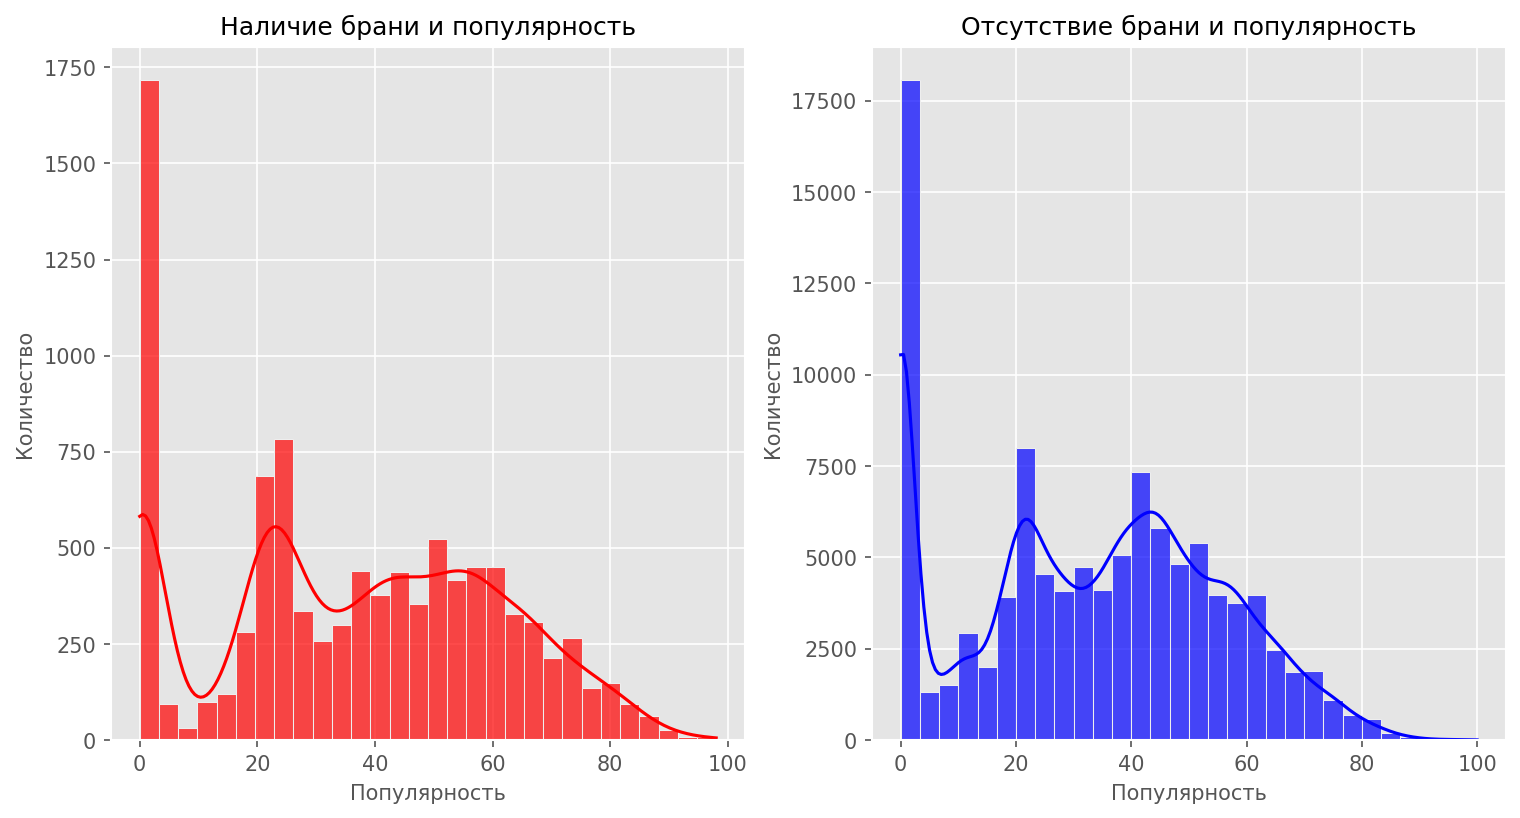

In [ ]:
plt.figure(figsize=(12, 6), dpi=150)

# Plot for explicit = True
plt.subplot(1, 2, 1)
sns.histplot(df[df['explicit'] == 1]['popularity'], bins=30, kde=True, color='red', alpha=0.7)
plt.title("Наличие брани и популярность", fontsize=12)
plt.xlabel("Популярность", fontsize=10)
plt.ylabel("Количество", fontsize=10)

# Plot for explicit = False
plt.subplot(1, 2, 2)
sns.histplot(df[df['explicit'] == 0]['popularity'], bins=30, kde=True, color='blue', alpha=0.7)
plt.title("Отсутствие брани и популярность", fontsize=12)
plt.xlabel("Популярность", fontsize=10)
plt.ylabel("Количество", fontsize=10)

По графику видим, что наличие нецензурной речи в песнях положительно влияет на популярность

Проверим есть ли связь громкости треков с их популярностью

По таблице корреляции мы заметили, что жанр трека влияет на популярность

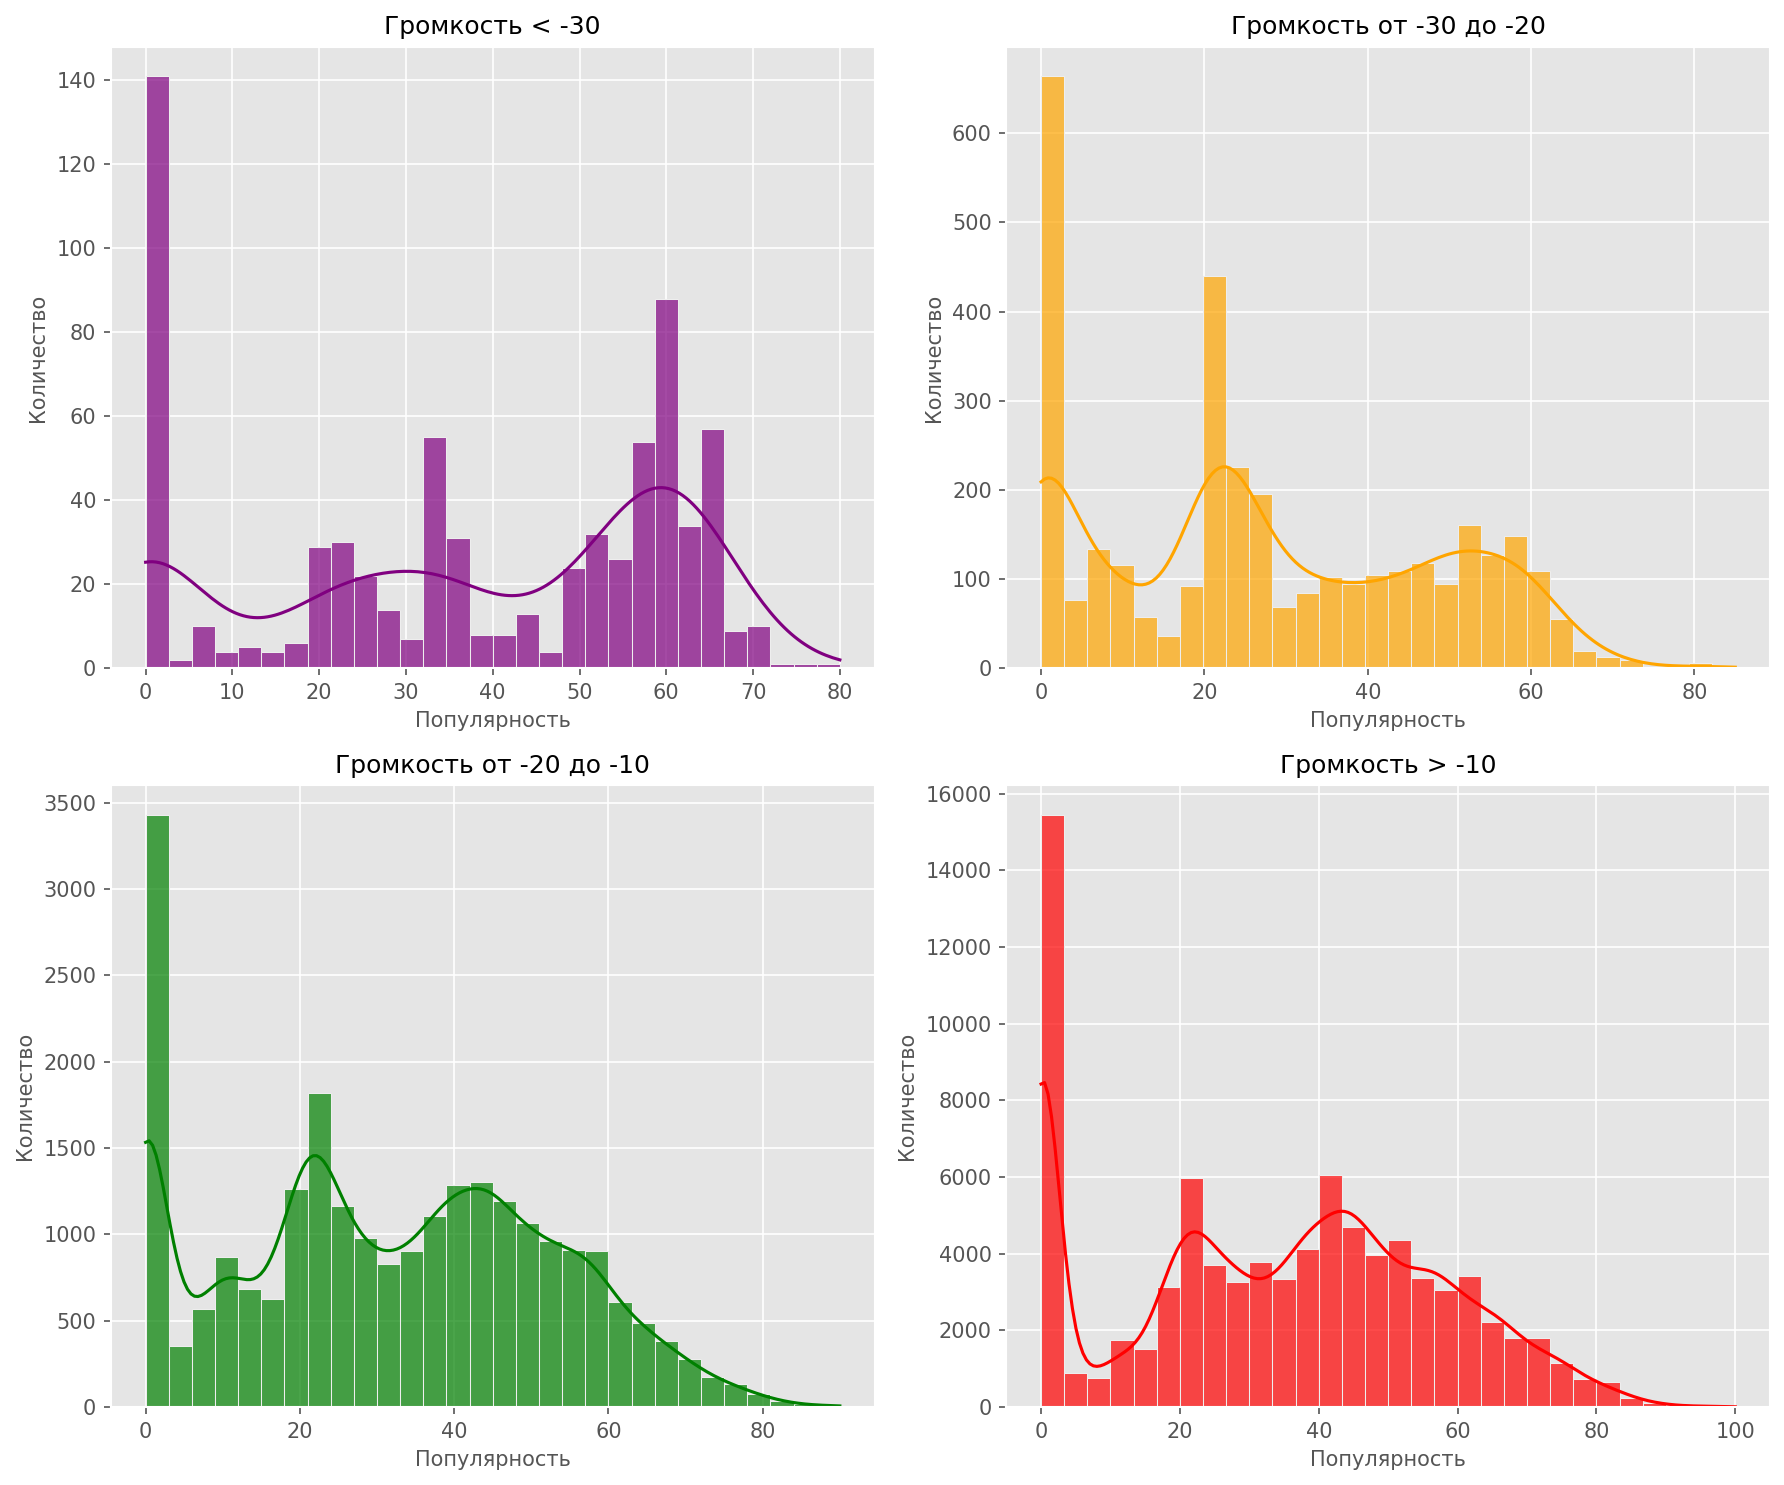

In [ ]:
plt.figure(figsize=(12, 10), dpi=150)

# Loudness < -30
plt.subplot(2, 2, 1)
sns.histplot(df[df['loudness'] <= -30]['popularity'], bins=30, kde=True, color='purple', alpha=0.7)
plt.title("Громкость < -30", fontsize=12)
plt.xlabel("Популярность", fontsize=10)
plt.ylabel("Количество", fontsize=10)

# Loudness between -30 and -20
plt.subplot(2, 2, 2)
sns.histplot(df[(df['loudness'] > -30) & (df['loudness'] <= -20)]['popularity'], bins=30, kde=True, color='orange', alpha=0.7)
plt.title("Громкость от -30 до -20", fontsize=12)
plt.xlabel("Популярность", fontsize=10)
plt.ylabel("Количество", fontsize=10)

# Loudness between -20 and -10
plt.subplot(2, 2, 3)
sns.histplot(df[(df['loudness'] > -20) & (df['loudness'] <= -10)]['popularity'], bins=30, kde=True, color='green', alpha=0.7)
plt.title("Громкость от -20 до -10", fontsize=12)
plt.xlabel("Популярность", fontsize=10)
plt.ylabel("Количество", fontsize=10)

# Loudness > -10
plt.subplot(2, 2, 4)
sns.histplot(df[df['loudness'] > -10]['popularity'], bins=30, kde=True, color='red', alpha=0.7)
plt.title("Громкость > -10", fontsize=12)
plt.xlabel("Популярность", fontsize=10)
plt.ylabel("Количество", fontsize=10)

plt.tight_layout()
plt.show()


Замечаем, что треки громкостью >-10 и меньше -30 более популярны

In [ ]:
df['loudness_FE'] = 0
df.loc[df['loudness'] > -10, 'loudness_FE'] = 1
df.loc[df['loudness'] <= -30, 'loudness_FE'] = 2

# Display the updated columns
df[['loudness','loudness_FE']].head()

<ipython-input-30-01af3ca77f0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loudness_FE'] = 0


loudness  loudness_FE
0    -6.746            1
1   -17.235            0
2    -9.734            1
3   -18.515            0
4    -9.681            1

Танцевальность музыки - для многих одно из самых главных качеств в музыки. Проверим влияние этого качества на популярность трека.

<ipython-input-31-c14682789e31>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['danceability_bin'] = pd.cut(df['danceability'], bins=10, labels=False)


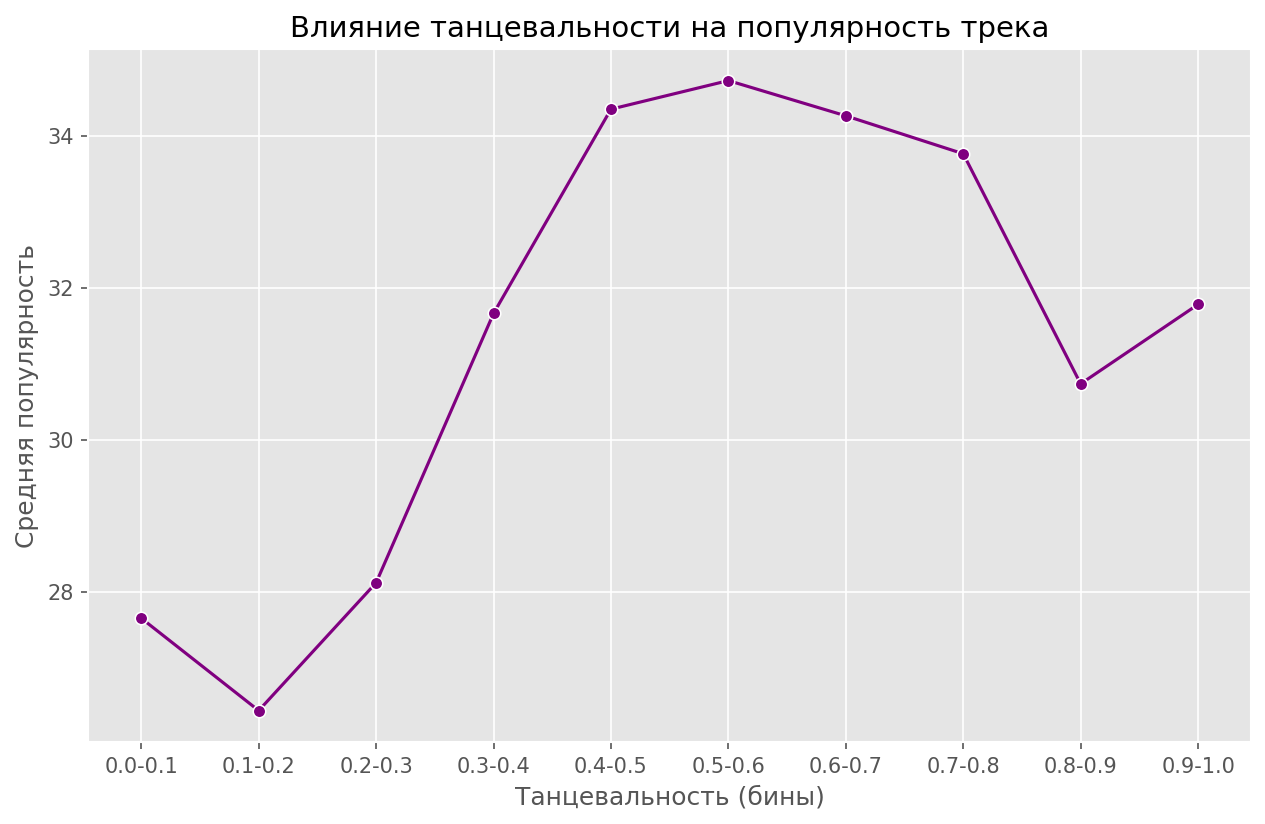

In [ ]:

plt.figure(figsize=(10, 6), dpi=150)

df['danceability_bin'] = pd.cut(df['danceability'], bins=10, labels=False)
avg_popularity_per_bin = df.groupby('danceability_bin')['popularity'].mean()

sns.lineplot(x=avg_popularity_per_bin.index, y=avg_popularity_per_bin.values, marker='o', color='purple')
plt.title("Влияние танцевальности на популярность трека", fontsize=14)
plt.xlabel("Танцевальность (бины)", fontsize=12)
plt.ylabel("Средняя популярность", fontsize=12)
plt.xticks(ticks=range(10), labels=[f'{i/10:.1f}-{(i+1)/10:.1f}' for i in range(10)])
plt.grid(True)
plt.show()


Замечаем, что танцевальности от 0.4 до 0.8 в среднем соответствует высокая популярность. Отметим это в нашем датасете

In [ ]:
df['danceability_high_popularity'] = ((df['danceability'] >= 0.5) & (df['danceability'] <= 0.8)).astype(int)

df[['danceability', 'danceability_high_popularity', 'popularity']].head()

<ipython-input-32-8b41e77df47b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['danceability_high_popularity'] = ((df['danceability'] >= 0.5) & (df['danceability'] <= 0.8)).astype(int)


danceability  danceability_high_popularity  popularity
0         0.676                             1          73
1         0.420                             0          55
2         0.438                             0          57
3         0.266                             0          71
4         0.618                             1          82

Из таблицы корреляции видно, что параметр Instrumentalness имеет высокую отрицательную корреляцию, а значит его влияние на популярность обратное(то есть чем меньше параметр, тем больше популярность)

ПОсмотрим график и создадим признак

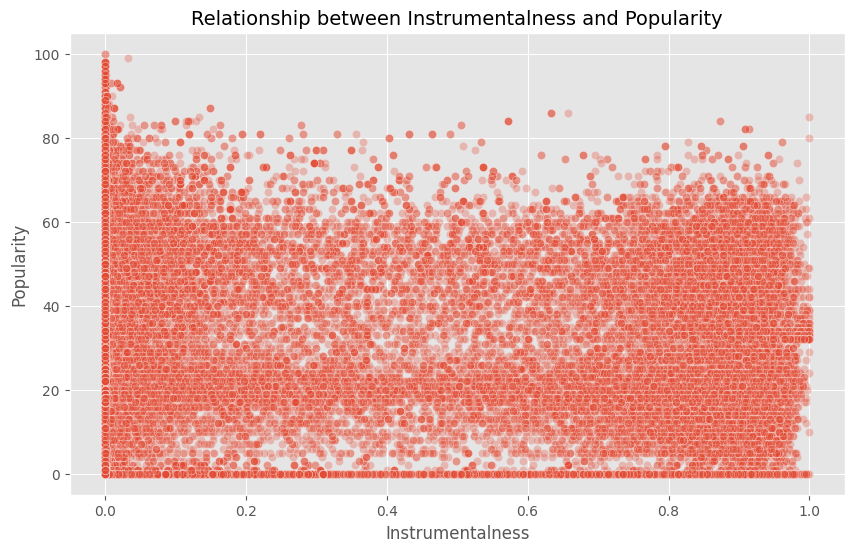

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['instrumentalness'], y=df['popularity'], alpha=0.3)
plt.title('Relationship between Instrumentalness and Popularity', fontsize=14)
plt.xlabel('Instrumentalness', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.grid(True)
plt.show()



In [ ]:
def classify_instrumentalness(value):
    if value > 0.5:
        return -1
    elif 0.1 <= value <= 0.5:
        return 0
    else:
        return 1


df['instrumentalness_category'] = df['instrumentalness'].apply(classify_instrumentalness)

df[['instrumentalness', 'popularity', 'instrumentalness_category']]

<ipython-input-34-6014b1eb1da8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['instrumentalness_category'] = df['instrumentalness'].apply(classify_instrumentalness)


instrumentalness  popularity  instrumentalness_category
0               0.000001          73                          1
1               0.000006          55                          1
2               0.000000          57                          1
3               0.000071          71                          1
4               0.000000          82                          1
...                  ...         ...                        ...
113995          0.928000          21                         -1
113996          0.976000          22                         -1
113997          0.000000          22                          1
113998          0.000000          41                          1
113999          0.000000          22                          1

[113999 rows x 3 columns]

Треки с высоким уровнем речи (speechiness) могут быть менее популярны, так как это может указывать на подкасты, разговорные треки или речевые вставки, которые не всегда популярны как музыка.

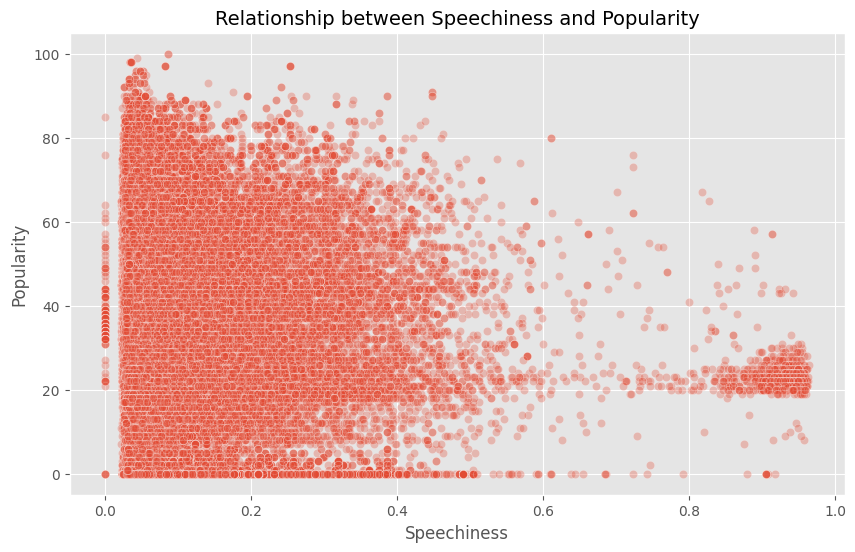

In [ ]:
# Plot the relationship between speechiness and popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['speechiness'], y=df['popularity'], alpha=0.3)
plt.title('Relationship between Speechiness and Popularity', fontsize=14)
plt.xlabel('Speechiness', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.grid(True)
plt.show()

Видно, что низкие значения speechiness (ближе к музыке) связаны с большей популярностью, а высокие значения (>0.66, ближе к речевым трекам) — с меньшей.

In [ ]:
def classify_speechiness(value):
    if value > 0.5:
        return -1
    elif 0.15 <= value <= 0.5:
        return 0
    else:
        return 1


df['speechiness_category'] = df['speechiness'].apply(classify_speechiness)

df[['speechiness', 'popularity', 'speechiness_category']].head(30)

<ipython-input-36-76efd44cfc7a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['speechiness_category'] = df['speechiness'].apply(classify_speechiness)


speechiness  popularity  speechiness_category
0        0.1430          73                     1
1        0.0763          55                     1
2        0.0557          57                     1
3        0.0363          71                     1
4        0.0526          82                     1
5        0.1050          58                     1
6        0.0355          74                     1
7        0.0417          80                     1
8        0.0369          74                     1
9        0.0295          56                     1
10       0.0291          74                     1
11       0.0429          69                     1
12       0.0331          52                     1
13       0.0285          62                     1
14       0.0327          56                     1
15       0.0274          58                     1
16       0.0391          56                     1
17       0.0461          54                     1
18       0.0369          68                     1
19       0.0283          67                     1
20       0.0417          75                     1
21       0.0266          63                     1
22       0.0355          70                     1
23       0.0258           0                     1
24       0.0392           0                     1
25       0.0352           1                     1
26       0.0495           0                     1
27       0.0381           0                     1
28       0.0495           0                     1
29       0.0495           0                     1

Треки с умеренным уровнем valence (эмоционального тона) более популярны, так как они сбалансированы между слишком позитивным и слишком негативным настроением, она более универсальны

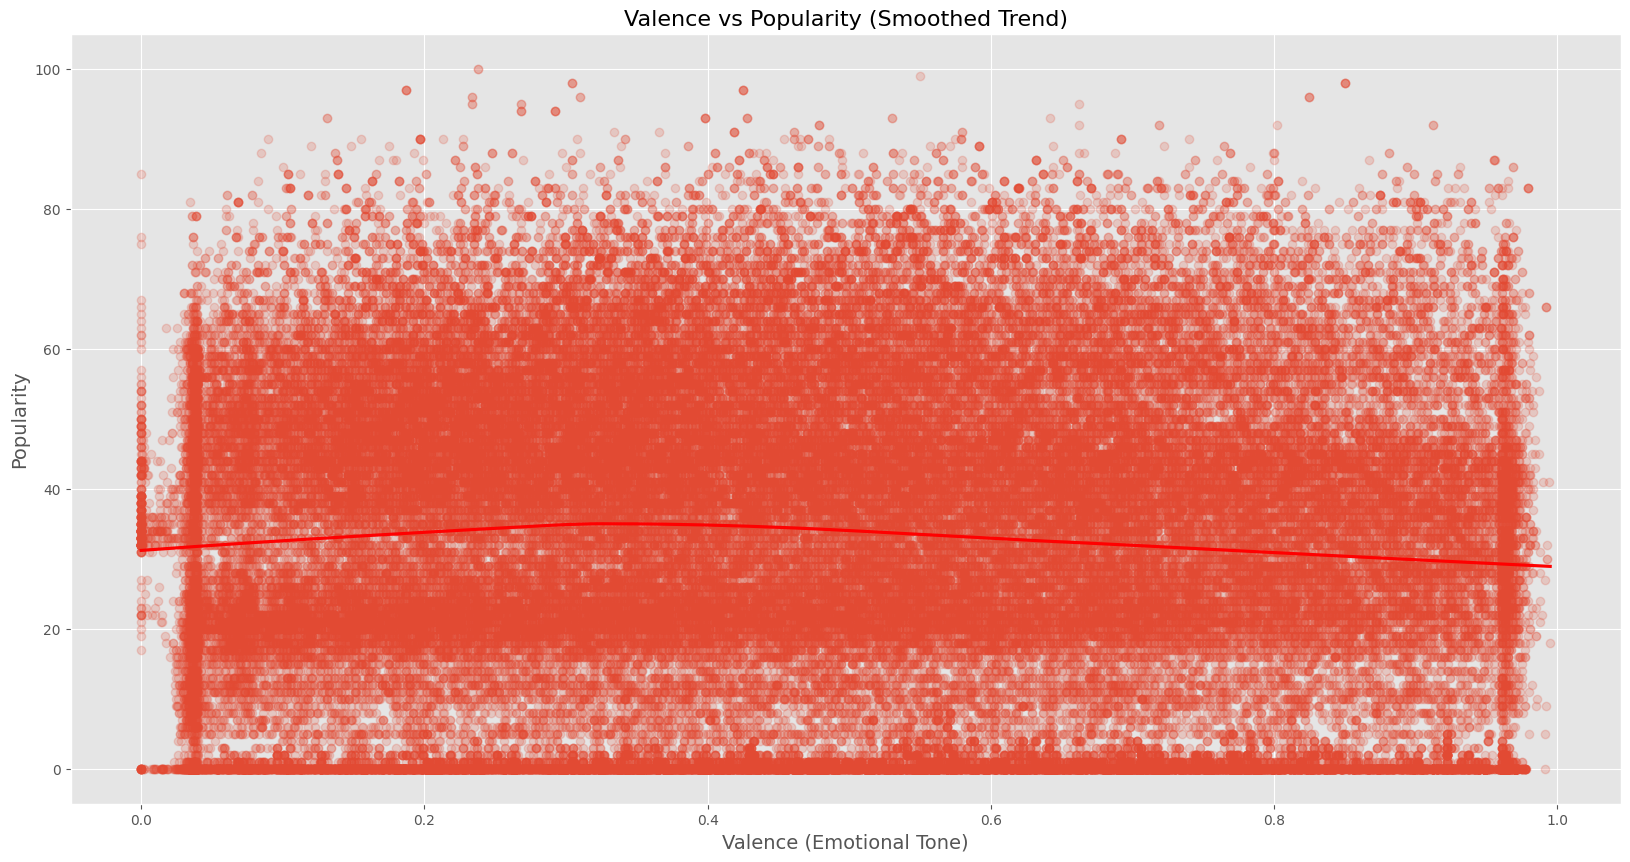

In [ ]:
# Create a more visually appealing plot for valence and popularity
plt.figure(figsize=(20, 10))

# Add a smoothed line to better see trends
sns.regplot(
    x=df['valence'],
    y=df['popularity'],
    scatter_kws={'alpha': 0.2},
    line_kws={'color': 'red'},
    lowess=True
)

# Customize the plot
plt.title('Valence vs Popularity (Smoothed Trend)', fontsize=16)
plt.xlabel('Valence (Emotional Tone)', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.grid(True)
plt.show()

Видим, что гипотеза, хоть и незначительно, но подтверждается.

In [ ]:
def binary_classify_valence(value):
    if 0.33 <= value <= 0.66:
        return 1
    else:
        return 0

df['valence_binary'] = df['valence'].apply(binary_classify_valence)

df[['valence', 'popularity', 'valence_binary']].head(10)

<ipython-input-38-ff87cd00575d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['valence_binary'] = df['valence'].apply(binary_classify_valence)


valence  popularity  valence_binary
0   0.7150          73               0
1   0.2670          55               0
2   0.1200          57               0
3   0.1430          71               0
4   0.1670          82               0
5   0.6660          58               0
6   0.0765          74               0
7   0.7120          80               0
8   0.6690          74               0
9   0.1960          56               0

In [ ]:
df.corr()

artists  popularity  duration_ms  explicit  \
artists                       1.000000    0.003636    -0.021576 -0.004677   
popularity                    0.003636    1.000000    -0.007129  0.044078   
duration_ms                  -0.021576   -0.007129     1.000000 -0.065270   
explicit                     -0.004677    0.044078    -0.065270  1.000000   
danceability                 -0.009925    0.035444    -0.073435  0.122506   
key                           0.006619   -0.003847     0.008123  0.004485   
loudness                     -0.018846    0.050420    -0.003475  0.108587   
mode                         -0.002974   -0.013948    -0.035581 -0.037216   
speechiness                  -0.016229   -0.044930    -0.062605  0.307951   
instrumentalness              0.016069   -0.095147     0.124364 -0.103405   
liveness                     -0.007987   -0.005397     0.010308  0.032547   
valence                       0.001019   -0.040522    -0.154464 -0.003378   
tempo                         0.001168    0.013212     0.024356 -0.002815   
time_signature               -0.008208    0.031076     0.018229  0.038387   
track_genre                  -0.008688    0.032696    -0.032822 -0.054827   
genre_quality                 0.019574    0.396853    -0.044796  0.067078   
mid_duration                 -0.022233    0.068572    -0.186270  0.020167   
loudness_FE                  -0.010925    0.061478    -0.015546  0.084523   
danceability_bin             -0.009506    0.033742    -0.071882  0.123290   
danceability_high_popularity  0.011009    0.048617    -0.049133  0.000729   
instrumentalness_category    -0.017069    0.094489    -0.132951  0.102041   
speechiness_category          0.010490    0.031707     0.069736 -0.276933   
valence_binary                0.001877    0.038475    -0.044372  0.047567   

                              danceability       key  loudness      mode  \
artists                          -0.009925  0.006619 -0.018846 -0.002974   
popularity                        0.035444 -0.003847  0.050420 -0.013948   
duration_ms                      -0.073435  0.008123 -0.003475 -0.035581   
explicit                          0.122506  0.004485  0.108587 -0.037216   
danceability                      1.000000  0.036470  0.259076 -0.069224   
key                               0.036470  1.000000  0.038591 -0.135911   
loudness                          0.259076  0.038591  1.000000 -0.041768   
mode                             -0.069224 -0.135911 -0.041768  1.000000   
speechiness                       0.108625  0.020419  0.060826 -0.046535   
instrumentalness                 -0.185608 -0.006821 -0.433478 -0.049961   
liveness                         -0.131620 -0.001597  0.076897  0.014004   
valence                           0.477347  0.034099  0.279851  0.021964   
tempo                            -0.050448  0.010914  0.212447  0.000572   
time_signature                    0.207219  0.015064  0.191992 -0.024090   
track_genre                       0.003570 -0.005509 -0.027233  0.005245   
genre_quality                     0.060417  0.002069  0.114816 -0.015128   
mid_duration                      0.072806  0.008101  0.206798 -0.002302   
loudness_FE                       0.124656  0.027995  0.612829 -0.034821   
danceability_bin                  0.986665  0.035900  0.254997 -0.068358   
danceability_high_popularity      0.510175  0.015923  0.171475 -0.020988   
instrumentalness_category         0.176749  0.004464  0.400757  0.053180   
speechiness_category             -0.110247 -0.022116 -0.068811  0.050262   
valence_binary                    0.085942  0.017136  0.116684 -0.008957   

                              speechiness  instrumentalness  ...  \
artists                         -0.016229          0.016069  ...   
popularity                      -0.044930         -0.095147  ...   
duration_ms                     -0.062605          0.124364  ...   
explicit                         0.307951         -0.103405  ...   
danceability     

Из новой таблицы корреляции можем сделать выводы:

Удачные признаки:

genre_quality и loudness_FE — самые полезные, с корреляциями выше 0.05.
mid_duration и danceability_high_popularity также добавляют значимость модели.

Пересмотрим границы остальных признаков.

In [ ]:
def classify_speechiness(value):
    if value > 0.5:
        return -1
    elif 0.1 <= value <= 0.5:
        return 0
    else:
        return 1


df['speechiness_category'] = df['speechiness'].apply(classify_speechiness)


df[['speechiness', 'popularity', 'speechiness_category']].head(30)

def binary_classify_valence(value):
    if 0.4 <= value <= 0.55:
        return 1
    else:
        return 0

df['valence_binary'] = df['valence'].apply(binary_classify_valence)

df[['valence', 'popularity', 'valence_binary']].head(10)

df['danceability_high_popularity'] = ((df['danceability'] >= 0.6) & (df['danceability'] <= 0.8)).astype(int)

df[['danceability', 'danceability_high_popularity', 'popularity']].head()

def classify_instrumentalness(value):
    if value > 0.3:
        return -1
    elif 0.1 <= value <= 0.3:
        return 0
    else:
        return 1


df['instrumentalness_category'] = df['instrumentalness'].apply(classify_instrumentalness)

df[['instrumentalness', 'popularity', 'instrumentalness_category']]

<ipython-input-40-f682536b0dd7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['speechiness_category'] = df['speechiness'].apply(classify_speechiness)
<ipython-input-40-f682536b0dd7>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['valence_binary'] = df['valence'].apply(binary_classify_valence)
<ipython-input-40-f682536b0dd7>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

instrumentalness  popularity  instrumentalness_category
0               0.000001          73                          1
1               0.000006          55                          1
2               0.000000          57                          1
3               0.000071          71                          1
4               0.000000          82                          1
...                  ...         ...                        ...
113995          0.928000          21                         -1
113996          0.976000          22                         -1
113997          0.000000          22                          1
113998          0.000000          41                          1
113999          0.000000          22                          1

[113999 rows x 3 columns]

In [ ]:
df.corr()

artists  popularity  duration_ms  explicit  \
artists                       1.000000    0.003636    -0.021576 -0.004677   
popularity                    0.003636    1.000000    -0.007129  0.044078   
duration_ms                  -0.021576   -0.007129     1.000000 -0.065270   
explicit                     -0.004677    0.044078    -0.065270  1.000000   
danceability                 -0.009925    0.035444    -0.073435  0.122506   
key                           0.006619   -0.003847     0.008123  0.004485   
loudness                     -0.018846    0.050420    -0.003475  0.108587   
mode                         -0.002974   -0.013948    -0.035581 -0.037216   
speechiness                  -0.016229   -0.044930    -0.062605  0.307951   
instrumentalness              0.016069   -0.095147     0.124364 -0.103405   
liveness                     -0.007987   -0.005397     0.010308  0.032547   
valence                       0.001019   -0.040522    -0.154464 -0.003378   
tempo                         0.001168    0.013212     0.024356 -0.002815   
time_signature               -0.008208    0.031076     0.018229  0.038387   
track_genre                  -0.008688    0.032696    -0.032822 -0.054827   
genre_quality                 0.019574    0.396853    -0.044796  0.067078   
mid_duration                 -0.022233    0.068572    -0.186270  0.020167   
loudness_FE                  -0.010925    0.061478    -0.015546  0.084523   
danceability_bin             -0.009506    0.033742    -0.071882  0.123290   
danceability_high_popularity  0.005134    0.021286    -0.049247  0.027681   
instrumentalness_category    -0.018306    0.091777    -0.134684  0.099745   
speechiness_category          0.017169    0.042124     0.079237 -0.276968   
valence_binary               -0.001575    0.028614    -0.025080  0.032619   

                              danceability       key  loudness      mode  \
artists                          -0.009925  0.006619 -0.018846 -0.002974   
popularity                        0.035444 -0.003847  0.050420 -0.013948   
duration_ms                      -0.073435  0.008123 -0.003475 -0.035581   
explicit                          0.122506  0.004485  0.108587 -0.037216   
danceability                      1.000000  0.036470  0.259076 -0.069224   
key                               0.036470  1.000000  0.038591 -0.135911   
loudness                          0.259076  0.038591  1.000000 -0.041768   
mode                             -0.069224 -0.135911 -0.041768  1.000000   
speechiness                       0.108625  0.020419  0.060826 -0.046535   
instrumentalness                 -0.185608 -0.006821 -0.433478 -0.049961   
liveness                         -0.131620 -0.001597  0.076897  0.014004   
valence                           0.477347  0.034099  0.279851  0.021964   
tempo                            -0.050448  0.010914  0.212447  0.000572   
time_signature                    0.207219  0.015064  0.191992 -0.024090   
track_genre                       0.003570 -0.005509 -0.027233  0.005245   
genre_quality                     0.060417  0.002069  0.114816 -0.015128   
mid_duration                      0.072806  0.008101  0.206798 -0.002302   
loudness_FE                       0.124656  0.027995  0.612829 -0.034821   
danceability_bin                  0.986665  0.035900  0.254997 -0.068358   
danceability_high_popularity      0.558150  0.026086  0.119525 -0.051532   
instrumentalness_category         0.173412  0.003348  0.387326  0.055548   
speechiness_category             -0.103920 -0.032165 -0.124862  0.052004   
valence_binary                    0.043435  0.011969  0.070694 -0.011192   

                              speechiness  instrumentalness  ...  \
artists                         -0.016229          0.016069  ...   
popularity                      -0.044930         -0.095147  ...   
duration_ms                     -0.062605          0.124364  ...   
explicit                         0.307951         -0.103405  ...   
danceability     

Работа с нейросетью

In [ ]:
# Разделение данных на обучающую и тестовую выборки
X = df.drop(columns=['popularity'])  # измените на ваш целевой признак, если необходимо
y = df['popularity']  # измените на ваш целевой признак, если необходимо
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Для начала рассмотрим простую модель и влияние признаков на ее результаты.

In [ ]:
# --- Линейная регрессия ---
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd

# Используем исходный датасет df
# Выбираем признаки и целевую переменную
X = df.drop(columns=['popularity'])
y = df['popularity']

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация и обучение модели
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Предсказания и метрики
linear_pred = linear_model.predict(X_test)
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_rmse = mean_squared_error(y_test, linear_pred) ** 0.5

print(f"Linear Regression MAE: {linear_mae}")
print(f"Linear Regression RMSE: {linear_rmse}")

Linear Regression MAE: 16.22696082221642
Linear Regression RMSE: 20.36277732578829


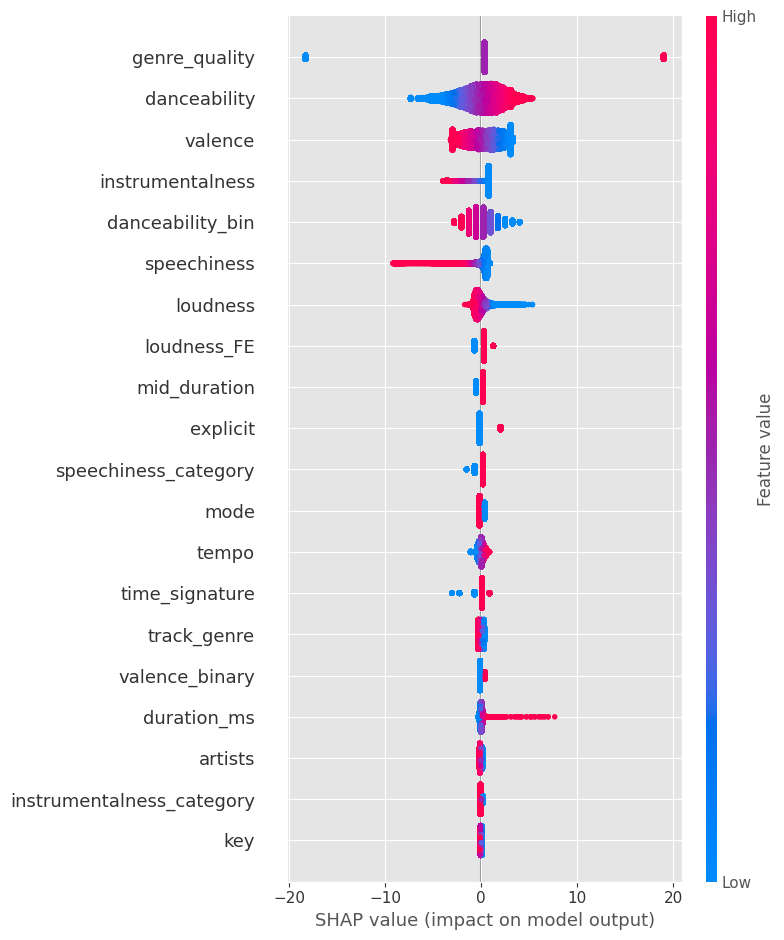

In [ ]:
import shap

# Создание explainer для линейной регрессии
explainer = shap.Explainer(linear_model, X_train)

# Рассчёт SHAP values
shap_values = explainer(X_train)

# Визуализация SHAP values для всех объектов
shap.summary_plot(shap_values, X_train)




Ключевые признаки
  genre_quality:
Это самый важный признак.
Высокие значения (High) увеличивают популярность, низкие значения (Low) — уменьшают.
danceability:
Второй по важности признак.
Высокая танцевальность (красный) связана с ростом популярности.
valence:
Умеренные значения положительно влияют на популярность, но крайние значения (очень низкие или очень высокие) могут снижать её.
instrumentalness:
Низкие значения признака (синий) увеличивают популярность, подтверждая, что треки с вокалом более популярны.
3. Признаки со средним влиянием
speechiness:
Высокие значения (много речи в треке) уменьшают популярность, низкие (музыкальные треки) увеличивают её.
loudness:
Более громкие треки связаны с большей популярностью.
explicit:
Треки с явным содержанием могут иметь как положительное, так и отрицательное влияние, в зависимости от контекста.
4. Малозначимые признаки
Признаки в нижней части графика (key, artists, instrumentalness_category):
Они имеют минимальное влияние на предсказания модели.
Возможно, их можно исключить или доработать.
5. Выводы и рекомендации
Оставить ключевые признаки:
genre_quality, danceability, valence, instrumentalness — важны для модели.
Доработать признаки:
speechiness и explicit можно улучшить, изменив их категории или границы.
Упростить модель:
Исключить признаки с минимальным вкладом (key, artists), чтобы избежать шума.
Проверить взаимодействие признаков:
Например, влияние danceability и valence вместе может быть сильнее, чем по отдельности.

Проанализировал влияние признаков на одном объекте

In [ ]:
# SHAP values для 0 объекта
explainer = shap.Explainer(linear_model, X_train)
shap_values = explainer(X_test)

# Вывод SHAP values для 0 объекта
shap_values_0 = pd.DataFrame({
    'Feature': X_test.columns,
    'SHAP Value': shap_values[0].values
})
print(shap_values_0)

                         Feature  SHAP Value
0                        artists    0.034213
1                    duration_ms    0.352845
2                       explicit   -0.152883
3                   danceability   -2.558822
4                            key   -0.032912
5                       loudness   -0.203640
6                           mode   -0.146180
7                    speechiness    0.615707
8               instrumentalness    0.795015
9                       liveness   -0.001673
10                       valence    3.030527
11                         tempo    0.236274
12                time_signature    0.101574
13                   track_genre   -0.318646
14                 genre_quality    0.372925
15                  mid_duration   -0.542829
16                   loudness_FE    0.296751
17              danceability_bin    1.759008
18  danceability_high_popularity   -0.003279
19     instrumentalness_category   -0.050304
20          speechiness_category    0.185085
21        

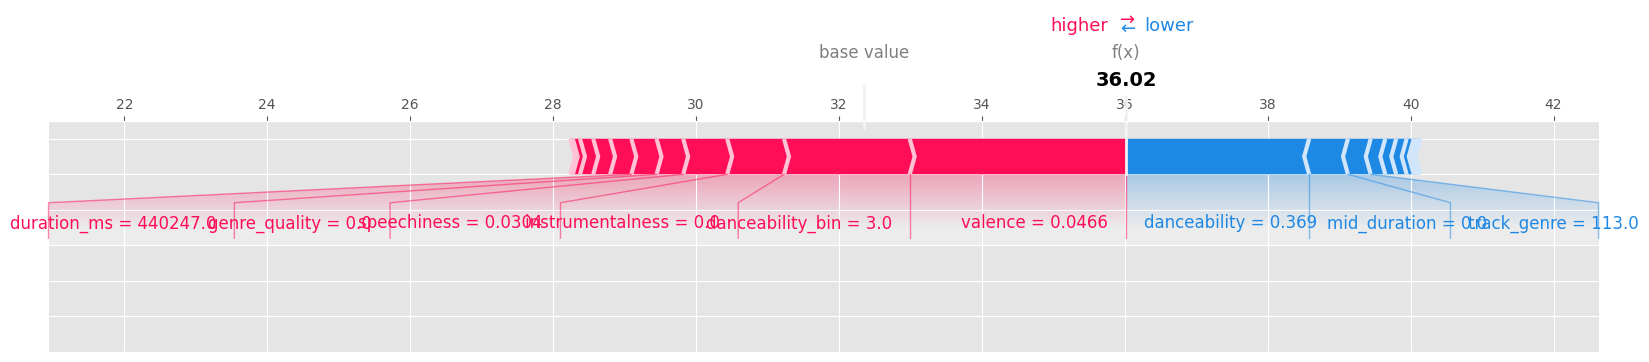

In [ ]:
# Визуализация SHAP values для одного объекта
shap.force_plot(
    shap_values[0].base_values,  # Используем базовое значение
    shap_values[0].values,      # SHAP values для одного объекта
    X_test.iloc[0, :],          # Входные признаки для объекта
    matplotlib=True             # Указание использовать matplotlib
)


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Эксперименты с моделями

In [ ]:
# Используем исходный датасет df
# Выбираем признаки и целевую переменную
X = df.drop(columns=['popularity'])
y = df['popularity']

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1) Линейная модель

In [ ]:
# --- Линейная регрессия ---
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import shap

# Используем исходный датасет df
# Выбираем признаки и целевую переменную
X = df.drop(columns=['popularity'])
y = df['popularity']

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Инициализация и обучение модели
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Предсказания и метрики
linear_pred = linear_model.predict(X_test)
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_rmse = mean_squared_error(y_test, linear_pred) ** 0.5
linear_r2 = r2_score(y_test, linear_pred)

print(f"Linear Regression MAE: {linear_mae}")
print(f"Linear Regression RMSE: {linear_rmse}")
print(f"Linear Regression R^2: {linear_r2}")

# Создание датасета с предсказаниями и реальными значениями
results_df = pd.DataFrame({
    'Predicted': linear_pred,
    'Actual': y_test.values
})
print(results_df.head())

Linear Regression MAE: 16.22696082221642
Linear Regression RMSE: 20.36277732578829
Linear Regression R^2: 0.16417758776239189
   Predicted  Actual
0  36.021292      50
1  10.313007      11
2  13.047969       0
3  32.707273      34
4  31.872808      57


По полученным результатам метрик, можно сделать вывод, что модель линейной регрессии показывает себя далеко не лучшим образом. Она нам не подходит

Рассмотрим модель RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import shap

# Инициализация и обучение модели
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Предсказания и метрики
rf_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = mean_squared_error(y_test, rf_pred) ** 0.5
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest R^2: {rf_r2}")

# Создание датасета с предсказаниями и реальными значениями
results_df = pd.DataFrame({
    'Predicted': rf_pred,
    'Actual': y_test.values
})
print(results_df.head())

Random Forest MAE: 10.298608327118838
Random Forest RMSE: 15.132435788575817
Random Forest R^2: 0.538408643740079
   Predicted  Actual
0      47.64      50
1      13.80      11
2       0.38       0
3      40.66      34
4      27.40      57


Модель показала очень точные результаты. Попробуем повысить их. Повысим количество деревьев

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import shap

# Инициализация и обучение модели
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Предсказания и метрики
rf_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = mean_squared_error(y_test, rf_pred) ** 0.5
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest R^2: {rf_r2}")

# Создание датасета с предсказаниями и реальными значениями
results_df = pd.DataFrame({
    'Predicted': rf_pred,
    'Actual': y_test.values
})
print(results_df.head())

Random Forest MAE: 10.279720441596458
Random Forest RMSE: 15.100803423817192
Random Forest R^2: 0.5403364186712214
   Predicted  Actual
0     46.678      50
1     14.145      11
2      0.536       0
3     38.390      34
4     26.330      57


Результаты модели повысились, пробуем дальше. Добавим еще несколько параметров для увелечения робастности модели.

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import shap

# Инициализация и обучение модели
rf_model = RandomForestRegressor(n_estimators=200, max_features=0.8, max_samples=0.8, random_state=42)
rf_model.fit(X_train, y_train)

# Предсказания и метрики
rf_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = mean_squared_error(y_test, rf_pred) ** 0.5
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest R^2: {rf_r2}")

# Создание датасета с предсказаниями и реальными значениями
results_df = pd.DataFrame({
    'Predicted': rf_pred,
    'Actual': y_test.values
})
print(results_df.head())

Random Forest MAE: 10.556120427284636
Random Forest RMSE: 15.18991464901623
Random Forest R^2: 0.534895378004445
   Predicted  Actual
0  46.800833      50
1  14.555000      11
2   1.194722       0
3  39.005000      34
4  27.901964      57


Наш эксперимент не привел к нужным результатам. Попробуем повысить количество деревьев и снизить количество используемых признаков при обучении одного дерева.

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import shap

# Инициализация и обучение модели
rf_model = RandomForestRegressor(n_estimators=300, max_features=0.7, max_samples=0.8, random_state=42)
rf_model.fit(X_train, y_train)

# Предсказания и метрики
rf_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = mean_squared_error(y_test, rf_pred) ** 0.5
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest R^2: {rf_r2}")

# Создание датасета с предсказаниями и реальными значениями
results_df = pd.DataFrame({
    'Predicted': rf_pred,
    'Actual': y_test.values
})
print(results_df.head())

Random Forest MAE: 10.55521267368919
Random Forest RMSE: 15.13049847689859
Random Forest R^2: 0.5385268255179083
   Predicted  Actual
0  46.770556      50
1  14.560000      11
2   1.255667       0
3  35.851667      34
4  30.298889      57


Наши действия не смогли повысить качество модели. Вернемся к лучшей попытке(2) и возьмем ее за лучший вариант из этого семейства.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Гиперпараметры для поиска
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 5]
}


# Инициализация RandomForest и RandomizedSearchCV
rf_model = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=1,
                                    scoring='neg_mean_absolute_error', verbose=1, random_state=42, n_jobs=-1)

# Обучение модели с RandomizedSearchCV
random_search.fit(X_train, y_train)

# Лучшие параметры
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Оценка финальной модели
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, y_pred)
rf_rmse = mean_squared_error(y_test, y_pred) ** 0.5
rf_r2 = r2_score(y_test, y_pred)

print(f"MAE: {rf_mae}")
print(f"RMSE: {rf_rmse}")
print(f"R^2: {rf_r2}")


results_df = pd.DataFrame({
    'Predicted': y_pred,
    'Actual': y_test.values
})
print(results_df.head())


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 3}
Random Forest with RandomizedSearchCV MAE: 16.17460323716931
Random Forest with RandomizedSearchCV RMSE: 20.32133297509947
Random Forest with RandomizedSearchCV R^2: 0.16757642330490907
   Predicted  Actual
0  35.179974      50
1  12.588924      11
2   6.041184       0
3  35.179974      34
4  32.950388      57


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.8 MB/s eta 0:00:00


In [ ]:
# --- CatBoost ---

from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import shap
#grid search Добавить
# Используем исходный датасет df
# Выбираем признаки и целевую переменную
X = df.drop(columns=['popularity'])
y = df['popularity']

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация и обучение модели
catboost_model = CatBoostRegressor(verbose=0, random_state=42, cat_features=['explicit','artists'])
catboost_model.fit(X_train, y_train)

# Предсказания и метрики
catboost_pred = catboost_model.predict(X_test)
catboost_mae = mean_absolute_error(y_test, catboost_pred)
catboost_rmse = mean_squared_error(y_test, catboost_pred) ** 0.5
catboost_r2 = r2_score(y_test, catboost_pred)

print(f"CatBoost MAE: {catboost_mae}")
print(f"CatBoost RMSE: {catboost_rmse}")
print(f"CatBoost R^2: {catboost_r2}")

# Создание датасета с предсказаниями и реальными значениями
results_df = pd.DataFrame({
    'Predicted': catboost_pred,
    'Actual': y_test.values
})
print(results_df.head())


CatBoost MAE: 9.560978829242995
CatBoost RMSE: 13.849299243438018
CatBoost R^2: 0.613369966945194
   Predicted  Actual
0  44.481639      50
1  10.988826      11
2   3.861403       0
3  50.525974      34
4  20.607922      57


CatBoost ожидаемо показал отличные результаты. Попробуем улучшить результаты изменив параметры.

In [ ]:
# --- CatBoost ---

from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import shap
#grid search Добавить
# Используем исходный датасет df
# Выбираем признаки и целевую переменную
X = df.drop(columns=['popularity'])
y = df['popularity']

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация и обучение модели
catboost_model = CatBoostRegressor(iterations = 1200, depth = 6, learning_rate = 0.1, verbose=0, random_state=42, cat_features=['explicit','artists'])
catboost_model.fit(X_train, y_train)

# Предсказания и метрики
catboost_pred = catboost_model.predict(X_test)
catboost_mae = mean_absolute_error(y_test, catboost_pred)
catboost_rmse = mean_squared_error(y_test, catboost_pred) ** 0.5
catboost_r2 = r2_score(y_test, catboost_pred)

print(f"CatBoost MAE: {catboost_mae}")
print(f"CatBoost RMSE: {catboost_rmse}")
print(f"CatBoost R^2: {catboost_r2}")

# Создание датасета с предсказаниями и реальными значениями
results_df = pd.DataFrame({
    'Predicted': catboost_pred,
    'Actual': y_test.values
})
print(results_df.head())


CatBoost MAE: 9.39999864414187
CatBoost RMSE: 13.726750492222644
CatBoost R^2: 0.6201820656474129
   Predicted  Actual
0  45.556789      50
1  12.912831      11
2   0.881134       0
3  51.649205      34
4  22.170915      57


Добавим early_stopping, добавим use_best_model вместе с валидационным сетом.

In [ ]:
# --- CatBoost ---

from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import shap
#grid search Добавить
# Используем исходный датасет df
# Выбираем признаки и целевую переменную
X = df.drop(columns=['popularity'])
y = df['popularity']

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# Инициализация и обучение модели
catboost_model = CatBoostRegressor(iterations = 1000, depth = 6, use_best_model=True, early_stopping_rounds=10, learning_rate = 0.15, verbose=0, random_state=42, cat_features=['explicit','artists'])
catboost_model.fit(X_train, y_train, eval_set=(X_val, y_val))

# Предсказания и метрики
catboost_pred = catboost_model.predict(X_test)
catboost_mae = mean_absolute_error(y_test, catboost_pred)
catboost_rmse = mean_squared_error(y_test, catboost_pred) ** 0.5
catboost_r2 = r2_score(y_test, catboost_pred)

print(f"CatBoost MAE: {catboost_mae}")
print(f"CatBoost RMSE: {catboost_rmse}")
print(f"CatBoost R^2: {catboost_r2}")

# Создание датасета с предсказаниями и реальными значениями
results_df = pd.DataFrame({
    'Predicted': catboost_pred,
    'Actual': y_test.values
})
print(results_df.head())


In [ ]:
catboost_model.get_params()

{'loss_function': 'RMSE',
 'verbose': 0,
 'random_state': 42,
 'cat_features': ['explicit', 'artists']}

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_pred = model.predict(X_test)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
rf_mae = mean_absolute_error(y_test, y_pred)
rf_rmse = mean_squared_error(y_test, y_pred) ** 0.5
rf_r2 = r2_score(y_test, y_pred)

print(f"MAE: {rf_mae}")
print(f"RMSE: {rf_rmse}")
print(f"R^2: {rf_r2}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 582.0029 - val_loss: 416.4838
Epoch 2/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 408.2254 - val_loss: 408.7445
Epoch 3/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 403.1260 - val_loss: 405.2269
Epoch 4/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 400.0659 - val_loss: 403.2421
Epoch 5/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 397.8613 - val_loss: 402.1386
Epoch 6/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 392.8997 - val_loss: 397.3980
Epoch 7/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 389.2461 - val_loss: 395.2117
Epoch 8/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 386.8466 - val_loss: 396.4808
Epoch 9/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 388.8602 - val_loss: 393.4648
Epoch 10/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 385.1808 - val_loss: 392.7928
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/s

Loss падает, можно продолжать обучение. Сделаем больше эпох

Однако скорость маленькая, поэтому усложним сеть. Добавим параметров.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

y_pred = model.predict(X_test)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
rf_mae = mean_absolute_error(y_test, y_pred)
rf_rmse = mean_squared_error(y_test, y_pred) ** 0.5
rf_r2 = r2_score(y_test, y_pred)

print(f"MAE: {rf_mae}")
print(f"RMSE: {rf_rmse}")
print(f"R^2: {rf_r2}")

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2280/2280 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 533.8898 - val_loss: 416.4003
Epoch 2/30
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 407.1353 - val_loss: 407.0671
Epoch 3/30
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 400.9298 - val_loss: 402.1321
Epoch 4/30
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 397.7861 - val_loss: 399.7491
Epoch 5/30
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 389.7983 - val_loss: 397.1627
Epoch 6/30
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 388.9250 - val_loss: 395.3173
Epoch 7/30
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 385.3125 - val_loss: 397.5317
Epoch 8/30
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 385.3613 - val_loss: 394.2870
Epoch 9/30
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 383.3317 - val_loss: 393.2472
Epoch 10/30
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 379.9093 - val_loss: 392.6008
Epoch 11/30
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 372.6963 - val_loss: 389

Модель успешно справляется, однако лосс снижается не всегда стабильно. Добавим дропауты, слой, поменяем количество нейронов

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

y_pred = model.predict(X_test)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
rf_mae = mean_absolute_error(y_test, y_pred)
rf_rmse = mean_squared_error(y_test, y_pred) ** 0.5
rf_r2 = r2_score(y_test, y_pred)

print(f"MAE: {rf_mae}")
print(f"RMSE: {rf_rmse}")
print(f"R^2: {rf_r2}")

In [ ]:
# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MAE: 15.562253750395357
RMSE: 19.83783077501538


MSE = квадрат
MAE = модуль
RMSE = MSE с корнем

R2

MAPE.

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

1.799865937379105e+16

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━

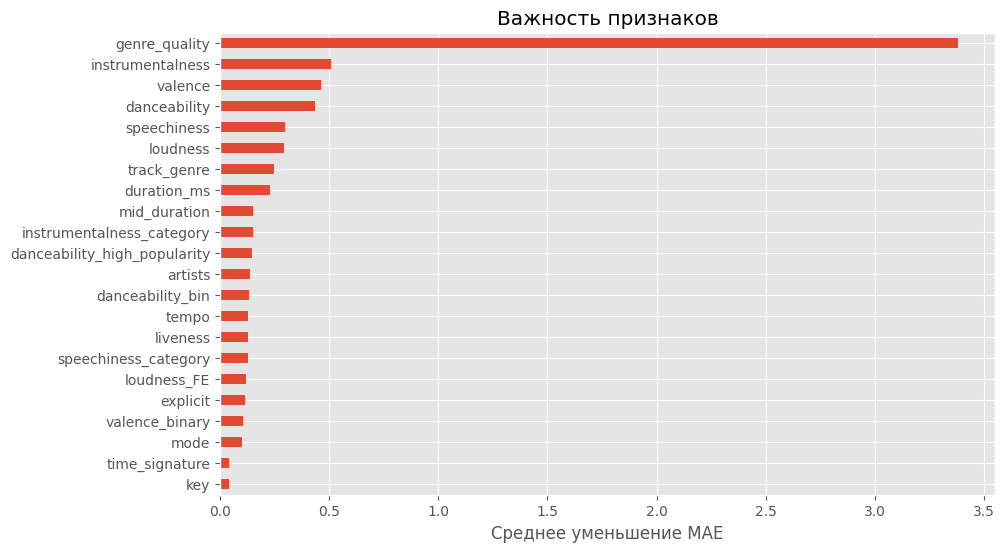

In [ ]:
# Важность признаков с помощью permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()